# Software Testing, Automation and the Job Market - a Data Programming Project

# Table of contents
1. [ Research Questions, Project Limitations and Motivation ](#research_questions)

   1.1 [Research Area](#area)
   
   1.2 [Research Questions](#questions)
   
   1.3 [Future Work / Project Limitations](#limitations)
   
   1.4 [Motivation](#motivation)
   
   1.5 [Previous Exploration of the Topic](#previous_exploration)
   
   1.6 [Acquisition of the Data Set and Choice of Data Source](#data_acq)
   
   1.7 [Ethical Implications](#ethical_implications)
   
   
2. [Web Scraping](#web_scraping)

   2.1 [The Initial ScraperHelpers.py Script](#initial_code)
   
   2.2 [The Final ScraperHelpers Script ](#final_code)
   
   2.3 [Full Code](#script)
   
   2.4 [Sampler Code to Demonstrate the Web Scraper Code](#sampler_code)
   
   2.5 [Lessons Learnt from Web Scraping](#scraping_lessons_learnt)
   

3. [Cleaning Up Data](#clean_up_data)

   3.1 [Cleaning Up Data Code](#clean_up_data_code)
    
   3.2 [Job Snippets Data Set: Data Cleaning Problem](#job_snippets)
   
   3.3 [Lessons Learnt from Data Cleaning](#clean_up_data_lessons_learnt)
   
   
4. [Natural Language Processing Analysis Methods: Frequency of Job Titles](#nlp)
    
    4.1 [Plotting the Twenty Most Frequent Job Titles](#plotting)
    
    4.2 [Advantages and Drawbacks to Plotting](#draw_back_plotting)
    
    4.3 [Job Titles as a WordCloud](#wordcloud)
    
    4.4 [Advantages and Drawbacks to the Word Cloud](#draw_back_word_cloud)
    
    4.5 [Most Frequent Job Titles Calculated Using the Counter Class](#counter_class)
    
    4.6 [Advantages and Drawbacks to the Counter Library](#draw_back_word_count)
    
    4.7 [Conclusions Drawn from the NLP Analysis](#nlp_conclusions)  
    
    
5. [Plotting the Frequency of Skills and Programming Languages](#programming_lang_and_skills)
    
    5.1 [Plotting the Frequency of Programming Languages](#programming_lang)
    
    5.2 [Plotting the Frequency of Skills](#skills)
    
    5.3 [Conclusions Drawn from the NLP Analysis in Regards to Skills](#skills_nlp_conclusions)
    
    
6. [Final Conclusions](#final_conclusions)        

### Research Questions, Project Limitations and Motivation <a id="research_questions"></a>

#### Research Area  <a id="area"></a>
The goal of this project is to analyse a dataset retrieved from a job board: the focus of the analysis is placed on software testing roles and the skills required for them. Another aim is to shed some light on the ongoing debate on whether automation is a replacement for manual testing(e.g __[Can Manual Testing Be Completely Replaced by Automation Testing?](https://blog.qasource.com/resources/can-manual-testing-be-completely-replaced-by-automation-testing)__). 

#### Research Questions  <a id="questions"></a>
The objective of this project is to answer the following questions:

<ul>
    <p> <li>What skills are required of software testers?</li> </p>
    <p> <li>Which programming languages are used for test automation?</li> </p>
</ul>

One caveat to consider is that the research questions may change depending on the final data set and the results retrieved from it. 

#### Future Work / Project Limitations  <a id="limitations"></a>

Some questions that are out of scope for this project are listed below:

<ul>
    <p> <li>How many job adverts mention a combination of manual testing and test automation in their descriptions? </li> </p>
    <p> <li>How many job descriptions mention training / upskilling? </li> </p>
    <p> <li>How many job listings focus on either manual testing or test automation alone? </li></p>
</ul>

These problems are out of scope because the data set used in this project is limited in terms of geographical region and size. As the project is focused on the English language, it excludes countries such as Japan or South Korea. Both countries have software that is used on a day to day basis (and where testing is, thus, of paramount importance). 

Other limitations to consider is where the jobs are located (rural areas may have less to offer than urban ones), what time period they were posted in, what seniority level they address and which area of testing they are focused on (e.g. performance testing). The fluctuating state of technology also has to be considered as software trends may change over time.  

#### Motivation  <a id="motivation"></a>
The motivation behind this specific area of research stems from my job as a QA where I have worked with both automation and manual testing tools. While I believe that a good software tester has skills in __[both white box and black box testing](https://www.geeksforgeeks.org/differences-between-black-box-testing-vs-white-box-testing/)__, I want to find out what philosophy the employment market is leaning towards.  
 
#### Previous Exploration of the Topic   <a id="previous_exploration"></a>
While __[many articles ](https://www.infoq.com/test-automation/articles/)__ have been and continue to be published on the subject, I have not seen any data-related projects focused on software testing on an academic level. 

An important source are the __[annual surveys carried out by Practitest](https://www.practitest.com/qa-learningcenter/webinars/learn-from-2021-state-of-testing/)__ which analyse software testing trends and provide information on them. These surveys showcase the versatility and importance of testing, especially with the rise of AI and development teams recognising the constant need for quality assurance.

Outside of the internet, there are __[also many workshops and courses available on automation testing](https://www.theknowledgeacademy.com/courses/automation-and-penetration-testing/fundamentals-of-test-automation-/bristol/)__ with their main focus placed on upskilling manual testers.

#### Acquisition of the Data Set and Choice of Data Source  <a id="data_acq"></a>
The datasets that were considered for this project came from job boards that have public APIs available for web crawling purposes. __[The Programmable Web](https://www.programmableweb.com/news/top-10-jobs-apis-2021/brief/2021/06/30)__ helped finding APIs that were free and did not require any prior set up. 

For this project, Indeed was chosen as it is a large job site aggregator and ensures sufficient data to perform some preliminary analysis.

#### Ethical Implications  <a id="ethical_implications"></a>

Scraping data as _[the article ](https://www.empiricaldata.org/dataladyblog/a-guide-to-ethical-web-scraping)_ to ethical web scraping indicates can have ethical implications when dealing with sensitive data -- such as someone’s health records, for example. 

Considering the points above, this project’s use of data is ethical since Indeed is an aggregator that collects job listings from other sites. The data collected from these sites is public, and there is no sensitive information in the job listings. 

In addition to that, the data is not intended to be used for commercial purposes, but to satisfy the research questions outlined in this report.

### Web Scraping <a id="web_scraping"></a>

The purpose of this section is to highlight how the chosen data sets were gathered, with the code and any further comments documented below. 

#### The Initial ScraperHelpers.py Script <a id="initial_code"></a>

The cell below depicts two scripts dealing with web crawling -- scraperHelpers.py and main.py. These scripts were used as a precursor to retrieve the final datasets. 

The former contains functions which help to scrape data from a given url, while the latter calls upon these methods in order to produce a txt file containing some relevant data.


```python
from bs4 import BeautifulSoup
import requests
from typing import List

```

The script uses BeautifulSoup in order to parse web scraped data into a HTML file, which can then be further analysed and processed. The request library is employed in order to retrieve data from a given url. Both libraries were chosen because of their ease of use. 

```python

def retrieve_data_as_text(url: str) -> str:
    """
    Retrieves data from a url
    :param url:
    :return: data in form of a text
    """
    return requests.get(url, HEADERS).text

```
The <i>retrieve_data_as_text</i> method pulls out the text from the job advert which can be used to verify that the correct data is being collected. The <i>retrieve_data_as_text</i> method is also reused in the <i>parse_data_into_html</i> method which is called in the main.py script.  

```python

def parse_data_into_html(url: str) -> BeautifulSoup:
    """
    Retrieves data in html format
    :param url: the url in string format
    :return: data parsed into HTML
    """
    data = retrieve_data_as_text(url)
    soup = BeautifulSoup(data, 'html.parser')
    return soup
```

The <i>parse_data_into_html </i> method retrieves the scraped web data as text and then – using the BeautifulSoup object – parses it into a HTML file. This file serves as the basis for all further processing and analysis.

```python

def find_jobs_by_header_title(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by header title
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job titles
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("h2", class_="jobTitle"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs
    
```
The <i> find_jobs_by_header_title </i> method lists all the data that falls under the category of job titles and appends them to a list of job titles. This list is then used as input in the <i>save_jobs_as_txt </i> method below in order to create a text file. 

```python

def save_jobs_as_txt(jobs: List):
    """
    Saves job titles into a text file
    :param jobs: a list of jobs
    :return: returns a txt file containing job titles
    """
    with open('job_titles.txt', 'w') as f:
        f.write("\n".join(str(job) for job in jobs))

```

The methods mentioned above are called from the main script as shown below. 

```python

# !/usr/bin/python
# !python
from scraperHelpers import *

URL = 'https://uk.indeed.com/Remote-QA-jobs'

scraped_data = parse_data_into_html(URL)
jobs = find_jobs_by_header_title(scraped_data)
save_jobs_as_txt(jobs)

```

#### The Final ScraperHelpers Script <a id="final_code"></a>

The two functions below are an extension to the script above. The full code is provided in the next section of this document. 

```python

#!/usr/bin/python
# !python
from bs4 import BeautifulSoup
import pandas as pd
import requests
from typing import List

# global variables
PAGE_COUNT_ITR = 250
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"}

def retrieve_pages_as_text() -> List:
    """
    Scrapes pages in the form of text
    :return: Returns a list of retrieved pages in the form of text
    """
    data_list = []
    page_count = 0
    while page_count <= PAGE_COUNT_ITR:
        url = f'https://uk.indeed.com/jobs?q=Remote%20QA&sort=date&start={page_count}'
        data_list.append(retrieve_data_as_text(url))
        page_count += 10
    return data_list
```

The <i>retrieve_pages_as_text</i> method returns a list of page texts. A while loop is used to increment the page count until a specific limit has been reached; the page count itself is added as a parameter to the URL.

```python
def extract_job_descriptions() -> List:
    """
    @Credit for this piece of code goes to:
    https://stackoverflow.com/questions/67504953/
    how-to-get-full-job-descriptions-from-indeed-using-python-and-beautifulsoup
    Any modifications are mine and mine alone

    Retrieve job summaries from multiple pages
    :return: a list of job descriptions
    """
    job_summaries = []
    api_url = "https://uk.indeed.com/viewjob?viewtype=embedded&jk={job_id}"
    url = "https://uk.indeed.com/jobs?q=Remote%20QA"
    scraped_data = BeautifulSoup(requests.get(url, headers=HEADERS).content, "html.parser")

    for job in scraped_data.select('a[id^="job_"]'):
        job_id = job["id"].split("_")[-1]
        scraped_job_data = BeautifulSoup(requests.get(api_url.format(job_id=job_id),
                                                      headers=HEADERS).content, "html.parser")
        job_description = scraped_job_data.select_one("#jobDescriptionText").get_text(strip=True)
        job_summaries.append(job_description)

    return job_summaries
```   
The <i>extract_job_descriptions</i> method returns a list of job summaries extracted from a single page on Indeed. Headers are used in order to retrieve more than one job id. 

```python
def parse_page_data_into_html() -> List:
    """
    Retrieves page data in html format
    :return: parsed page data as HTML supplied into a list
    """
    data_list = retrieve_pages_as_text()
    soup = []
    for data in data_list:
        soup.append(BeautifulSoup(data, 'html.parser'))
    return soup
```   
The <i> parse_page_data_into_html </i> method above returns a list of parsed HTML data which is further used to extract job titles from a given number of pages.

```python

# noinspection PyTypeChecker
def save_summaries_as_csv(extracted_job_titles: List):
    """
    Save the job summaries into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job summaries
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_descriptions.csv")


# noinspection PyTypeChecker
def save_titles_as_csv(extracted_job_titles: List):
    """
    Saves the extracted job titles into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job titles
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_titles.csv")

def find_jobs_by_summary(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by the summary
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job summaries
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("div", class_="job-snippet"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs
```

#### Full Code <a id="script"></a>
The next cell provides the full scripts, commented out where necessary to prevent any errors while running the Juptyer notebook.

In [1]:
# #!/usr/bin/python
# # !python
from bs4 import BeautifulSoup
import pandas as pd
import requests
from typing import List

# global variables
PAGE_COUNT_ITR = 250
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"}


def retrieve_pages_as_text() -> List:
    """
    Scrapes pages in the form of text
    :return: Returns a list of retrieved pages in the form of text
    """
    data_list = []
    page_count = 0
    while page_count <= PAGE_COUNT_ITR:
        url = f'https://uk.indeed.com/jobs?q=Remote%20QA&sort=date&start={page_count}'
        data_list.append(retrieve_data_as_text(url))
        page_count += 10
    return data_list


def extract_job_descriptions() -> List:
    """
    @Credit for this piece of code goes to:
    https://stackoverflow.com/questions/67504953/how-to-get-full-job-descriptions-from-indeed-using-python-and-beautifulsoup
    Any modifications are mine and mine alone

    Retrieve job summaries from multiple pages
    :return: a list of job descriptions
    """
    job_summaries = []
    api_url = "https://uk.indeed.com/viewjob?viewtype=embedded&jk={job_id}"
    url = "https://uk.indeed.com/jobs?q=Remote%20QA"
    scraped_data = BeautifulSoup(requests.get(url, headers=HEADERS).content, "html.parser")

    for job in scraped_data.select('a[id^="job_"]'):
        job_id = job["id"].split("_")[-1]
        scraped_job_data = BeautifulSoup(requests.get(api_url.format(job_id=job_id),
                                                      headers=HEADERS).content, "html.parser")
        job_description = scraped_job_data.select_one("#jobDescriptionText").get_text(strip=True)
        job_summaries.append(job_description)

    return job_summaries


def find_jobs_by_summary(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by the summary
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job summaries
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("div", class_="job-snippet"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs


def retrieve_data_as_text(url: str) -> str:
    """
    Retrieves data from a url
    :param url:
    :return: data in form of a text
    """
    return requests.get(url, HEADERS).text


def parse_data_into_html(url: str) -> BeautifulSoup:
    """
    Retrieves data in html format
    :param url: the url in string format
    :return: data parsed into HTML
    """
    data = retrieve_data_as_text(url)
    soup = BeautifulSoup(data, 'html.parser')
    return soup


def parse_page_data_into_html() -> List:
    """
    Retrieves page data in html format
    :return: parsed page data as HTML supplied into a list
    """
    data_list = retrieve_pages_as_text()
    soup = []
    for data in data_list:
        soup.append(BeautifulSoup(data, 'html.parser'))
    return soup


def find_jobs_by_header_title(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by header title
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job titles
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("h2", class_="jobTitle"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs


def save_jobs_as_txt(jobs: List):
    """
    Saves job titles into a text file
    :param jobs: a list of jobs
    :return: returns a txt file containing job titles
    """
    with open('job_titles.txt', 'w') as f:
        f.write("\n".join(str(job) for job in jobs))


# noinspection PyTypeChecker
def save_summaries_as_csv(extracted_job_titles: List):
    """
    Save the job summaries into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job summaries
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_descriptions.csv")


# noinspection PyTypeChecker
def save_titles_as_csv(extracted_job_titles: List):
    """
    Saves the extracted job titles into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job titles
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_titles.csv")
    
# # !/usr/bin/python
# # !python
# from scraperHelpers import * 

parsed_pages = parse_page_data_into_html()

extracted_job_titles = []
extracted_job_descriptions = []
extracted_job_snippets =[]

## The below is commented out 

# for page in parsed_pages:
    # extracted_job_titles.append(find_jobs_by_header_title(page))
    # extracted_job_snippets.append(find_jobs_by_summary(page))

# save_jobs_as_txt(extracted_job_titles)
# job_summaries = extract_job_descriptions()
# save_summaries_as_csv(extracted_job_snippets)
# save_titles_as_csv(extracted_job_titles)


#### Sampler Code to Demonstrate the Web Scraper Code <a id="sampler_code"></a>

The code in the next cell demonstrates some of the methods from the sections above to showcase how data can be scraped from websites. Comment out the lines underneath the function to see a sample HTML page in a prettified form. 

In [11]:
from bs4 import BeautifulSoup
import requests

HEADERS = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"}

def retrieve_data_as_text(url: str) -> str:
    """
    Retrieves data from a url
    :param url:
    :return: data in form of a text
    """
    return requests.get(url, HEADERS).text

def parse_data_into_html(url: str) -> BeautifulSoup:
    """
    Retrieves data in html format
    :param url: the url in string format
    :return: data parsed into HTML
    """
    data = retrieve_data_as_text(url)
    soup = BeautifulSoup(data, 'html.parser')
    return soup

url = "https://uk.indeed.com/jobs?q=Remote%20QA"
# scraped_data = parse_data_into_html(url)
# print(scraped_data.prettify())

#### Lessons Learnt from Web Scraping <a id="scraping_lessons_learnt"></a>

Although web scraping was a successful venture, there were a few Eureka moments that led to the following conclusions

<ul>
    <p> <li> Descriptions are hard to scrape, with the quality of the data that was retrieved being something of an issue. High expectations are to be avoided.</li> </p>
    <p> <li>Tutorials online are only useful as long as they do not advertise some service that has to be paid for. </li> </p>
    <p> <li> Moreover, it is easier to come across tutorials that teach sheer basics rather than 
    a solution to a more sophisticated problem. </li> </p>
    <p> <li> Cleaning up the data before storing it in its final format is important as it saves a lot of hassle during the later cleaning process. </li> </p>   
</ul>

### Cleaning Up Data  <a id="clean_up_data"></a>                                                                                                                                                                       
The following section is concerned with the cleaning up of data, with the code executed on the notebook itself. The assumption is made that the data is stored in the same directory. If the code is not working, please consider replacing the relative file paths with their absolute ones.

#### Cleaning Up Data Code <a id="clean_up_data_code"></a>  

The section below displays the code used for cleaning up the data sets. It is hardcoded and a bit brittle, due to unexpected complexities arising from the expectations of what the final data should look like. 

In [3]:
# please ensure that all the files are located within the same directory 

# import os in order to get the current directory 
import os
cwd = os.getcwd()

JOB_TITLES_PATH = os.path.join(cwd, "job_titles.csv") # if necessary, use a string with the absolute file path 
JOB_SNIPPETS_PATH = os.path.join(cwd, "job_descriptions.csv") # if necessary, use a string with the absolute file path 

# import the necessary libraries for data cleaning 
import io
import pandas as pd
import re 
from typing import List

# Read the data set in their raw and unedited format 
job_titles_data = pd.read_csv(JOB_TITLES_PATH)
job_snippets_data = pd.read_csv(JOB_SNIPPETS_PATH)

# The function carries out some actions that clean up the csv file
def clean_data(data_frame : pd.DataFrame): 
    # remove square brackets 
    data_frame_modified = job_titles_data.replace(to_replace ="[\([{})\]]", value = ",", regex = True)
    
    # remove all digits 
    pattern_with_numbers_removed = ''.join([i for i in data_frame_modified.to_string() if not i.isdigit()])
    
    # remove unnecessary space and commas
    pattern_with_all_numbers_removed = re.sub(' +', '', pattern_with_numbers_removed)
    pattern_with_commas_removed = re.sub(',,', ',', pattern_with_all_numbers_removed)
    
    # remove special characters
    pattern_with_ampersand_removed = re.sub('&', ',', pattern_with_commas_removed)
    pattern_with_special_char_removed = re.sub('#', ',', pattern_with_ampersand_removed)

    # remove unnamed 
    final_data_str = re.sub('Unnamed:', 'JOB TITLES', pattern_with_special_char_removed)
    
    return final_data_str

# We can use the list below to perform some interesting analysis
modified_job_titles_data = clean_data(job_titles_data) 

# print(modified_job_titles_data) 

# Unfortunately, the clean up function when too far for the job snippets, leaving it 
# to look identical to the job titles. Comment out the code below for 'proof' 

# print(clean_data(job_snippets_data))

#### Job Snippets Data: Data Cleaning Problem <a id="job_snippets"></a>   

The job snippets data could not be further cleaned. In fact, cleaning led to it being identical to the job titles data, which is why it has been disregarded from any further analysis as the results would be the same / not provide any further valuable information.

#### Lessons Learnt from Data Cleaning <a id="clean_up_data_lessons_learnt"></a>   

The takeaway lessons from the data cleaning attempts are: 

<ul>
<p><li>Cleaning up data is a far more involved process than expected, with the coding proving to be hands on / learning while doing.</li> </p>
    
<p><li>In the same vein, garbage data will be collected which can be seen as creating redundancy, thus creating an impact on any future analysis. </li></p>

<p><li>There is no guarantee that data will not get lost when cleaning up the csv file / removing white spaces.</li></p>

<p><li>A larger project would require far more planning in terms of cleaning up data algorithms. A naive attempt should be avoided.</li> </p>    
</ul>

### Natural Language Processing Analysis Methods: Frequency of Job Titles <a id="nlp"></a> 

This section performs some analysis using word clouds and other NLP-related methods, listing advantages and drawbacks for each respective approach. 

The reason why NLP methods were used is due to the fact that the frequency of skills within job titles can be displayed using such techniques. Moreover, the visual representation offered by word clouds and other graphs provides a more tangible approach to the problem. 

In [4]:
### Natural Language Processing  - installing the necessary dependencies 

import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud

  Using cached wordcloud-1.8.1-cp39-cp39-win_amd64.whl


#### Plotting the Twenty Most Frequent Job Titles  <a id="plotting"></a>

The focal point of this project is to analyse the frequency of job titles within the data set. One approach is to use the nlkt library to plot all tokens in the modified job titles list to showcase the frequency of words found within it.

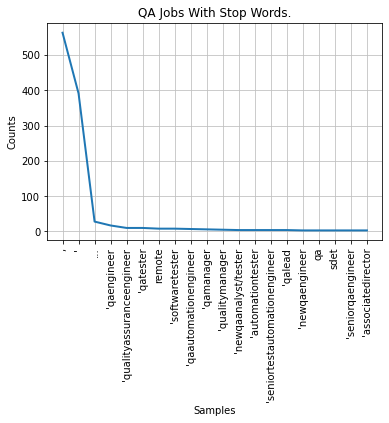

<AxesSubplot:title={'center':'QA Jobs With Stop Words.'}, xlabel='Samples', ylabel='Counts'>

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

sentence = modified_job_titles_data.lower()
tokens = nltk.tokenize.word_tokenize(sentence)

# creating a list without stop words 
filtered = [word for word in tokens if not word in stopwords.words()]
# print(filtered)

# Plotting data, with stop words 
import matplotlib.pyplot as plt

fd_stopwords = nltk.FreqDist(tokens)
fd_stopwords.plot(20, cumulative=False, title="QA Jobs With Stop Words.")

# Plotting data without stop words 
# The two graphs are commented out as -- spoiler alert -- they are identical to the ones above

# fd_no_stopwords = nltk.FreqDist(filtered) 
# fd_no_stopwords.plot(20, cumulative=False, title="QA Jobs With No Stop Words.")

#### Advantages and Drawbacks to Plotting <a id="draw_back_plotting"></a>

The advantage of the plotting method is that the data is presented in a user-friendly format, showing the frequency of job titles in a way that is easy to comprehend. The fact that the graph contains a numerical representation of how often certain words appear is useful for further analysis. 
 
Despite that; however, some garbage words have made it into the graph. While this is due to the data set and its imperfect state, this does showcase how important data cleaning is in order to avoid problems of such a nature in the future. 

#### Job Titles as a WordCloud <a id="wordcloud"></a>

The cell below displays job titles as a word cloud, which is generated using the WordCloud library.

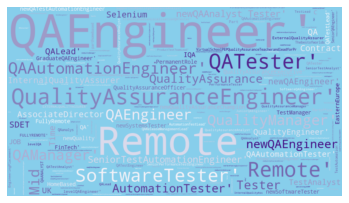

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# generating the word cloud, with some specific properties 
wordcloud = WordCloud(width=850, height=480, background_color="skyblue", colormap="Purples").generate(modified_job_titles_data)
    
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### Advantages and Drawbacks to the Word Cloud <a id="draw_back_word_cloud"></a>

One of the advantages to the word cloud is that it presents information in an aesthetic manner. Furthemore, the word cloud can be customised to one’s taste.

However, the disadvantage of the word cloud is that it showcases the frequency of words by depicting its size in a visual fashion and not via a numerical count. This makes the word cloud more useful for illustrative purposes rather than an in-depth analysis.

#### Most Frequent Job Titles Calculated Using the Counter Class <a id="counter_class"></a>

The method below showcases how to get the most frequent job titles using the Counter library.

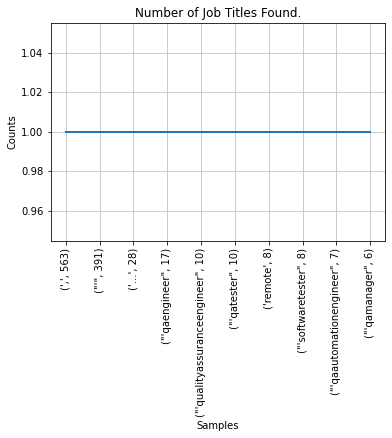

<AxesSubplot:title={'center':'Number of Job Titles Found.'}, xlabel='Samples', ylabel='Counts'>

In [8]:
from collections import Counter

# Count the frequencies using the Counter method 
frequencies = Counter(tokens)
ten_most_frequent = frequencies.most_common(10)

# print(ten_most_frequent)

# plot a frequency graph 
job_titles_freq = nltk.FreqDist(ten_most_frequent)
job_titles_freq.plot(len(ten_most_frequent), cumulative=False, title="Number of Job Titles Found.")

#### Advantages and Drawbacks to the Counter Library <a id="draw_back_word_count"></a>

The advantage of using the Counter library is that it comes with a count value that states how often a certain word occurs. This is more precise than the previous methods, because it gives a good starting point for further analysis. It can also be combined with the plotting method used before, which provides visual as well as numerical information.

One of the obvious drawbacks is that rubbish data has been collected again due to the flawed way the data was cleaned. 

#### Conclusions Drawn from the NLP Analysis <a id="nlp_conclusions"></a>  

Some of the tentative conclusions from the NLP analysis – despite the existence of garbage words - are: 

<ul>  
<p> <li>The fact that the words ‘automation’ and ‘sdet’ (Software Development Engineer in Test) are among the most frequent suggests that test automation is popular.  </li> </p>
    
<p> <li> The occurrence of words such as ‘manager’, ‘lead’ and ‘senior’ implies that software testers with a lot of experience are valuable to employers / recruiters. It can be assumed that testers with experience are preferable to ones with none. </li> </p> 
    
<p> <li> Quality assurance is associated with engineering, suggesting that software testing is something that is created – just like programming, which strengthens its link to automation (a skill that requires creating tests).</li> </p>  
</ul>

### Plotting the Frequency of Skills and Programming Languages <a id="programming_lang_and_skills"></a>

This section deals with analysing the frequency of certain skills and programming languages found within the existing job titles data set.

#### Plotting the Frequency of Programming Languages <a id="programming_lang"></a>

The cell belows provides a method that iterates through a given list of programming languages. 

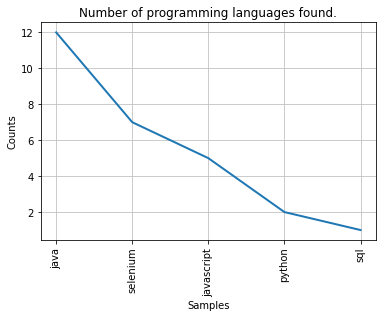

<AxesSubplot:title={'center':'Number of programming languages found.'}, xlabel='Samples', ylabel='Counts'>

In [9]:
# function that checks whether a token contains a given programming language 
def find_programming_languages(tokens: List) -> List:
    
    # list containing programming languages 
    programming_languages = ['selenium', 'java', 'c#', 'python', 
                             'c++', 'ruby', 'javascript', 'sql']
    
    # empty found languages list 
    found_languages = []
    
    # check whether token is equal to or contains one 
    # of the programming languages above
    for token in tokens:
        for language in programming_languages:
            if token.lower() == language or language in token.lower():
                
                # if token contains or is equal to a programming language, append it to the 
                # empty found languages list 
                found_languages.append(language)
                
    return found_languages 

languages_contained = find_programming_languages(tokens)

# plot a frequency graph 
number_of_programming_languages = nltk.FreqDist(languages_contained)
number_of_programming_languages.plot(len(number_of_programming_languages), cumulative=False, title="Number of programming languages found.")

#### Plotting the Frequency of Skills <a id="skills"></a>

The method from above has been modified to run through an array of skills rather than programming languages. 

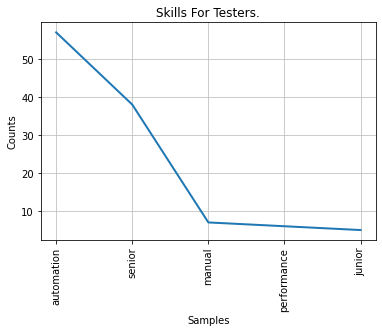

<AxesSubplot:title={'center':'Skills For Testers.'}, xlabel='Samples', ylabel='Counts'>

In [10]:
# function that checks whether a token contains a certain skill
def find_freq_of_skills(tokens: List) -> List:
    
    # list containing QA skills
    skills = ['automation', 'manual', 'regression', 'code', 'performance', 'senior', 'junior']
    
    # empty found skills list 
    found_skills = []
    
    # check whether token is equal to or contains one 
    # of the programming languages above
    for token in tokens:
        for skill in skills:
            if token.lower() == skill or skill in token.lower():
                
                # if token contains or is equal to a programming language, append it to the 
                # empty found languages list 
                found_skills.append(skill)
                
    return found_skills 

skills_within_titles = find_freq_of_skills(tokens)

# plot a frequency graph 
number_of_skills_in_titles = nltk.FreqDist(skills_within_titles)
number_of_skills_in_titles.plot(len(number_of_skills_in_titles), cumulative=False, title="Skills For Testers.")

#### Conclusions Drawn from the NLP Analysis in Regards to Skills <a id="skills_nlp_conclusions"></a>

Considering the limited range, the following conclusions should be viewed as speculative. Some of these observations have been noted in previous sections: 

<ul>
    <p><li>The popularity of Java and Selenium implies that test automation is an important part of the software testing process.</p></li>
    <p><li>The existence of SQL as an important programming language suggests that software testing is also concerned with how data is stored and / or processed within a database.</p></li>
    <p><li>The fact that Python and Java are used for automation showcases that open source is preferred over using tools that have to be paid for.</p></li>
    <p><li>The fact that one of the most sought after skills is automation suggests that software testing is becoming intertwined with test automation.</p></li>
    <p><li>However, the fact that manual testing is within the medium range of skills within the skills list  suggests that it is integral to the overall process as well.</p></li>
    <p><li>The word senior occurs more often than junior, suggesting that experience is preferred over lack thereof.</p></li>
    <p><li>The fact that the word performance shows up implies that specialist knowledge in this area is also considered important by the job market. </p></li>
</ul>

### Final Conclusions <a id="final_conclusions"></a>   

Overall, this project was rewarding in the sense that some answers could be found re: languages and skills required of software testers. While these answers need to be expanded upon, this project does offer some groundwork for the future.